## Cancer Death Rate Prediction

In this project, we are predicting cancer death rate in US. The data can be acquired from public data on github: https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Training_set_label.csv.

We are doing supervised learning with different methods before and after hyperparameter tuning and feature selection to get the best result.

## Get the Data

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load the data and display first 5 rows.

In [2]:
cancer  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Training_set_label.csv" )
display(cancer.head())

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,19.0,8,481.5,50038,2704,11.1,0.0,"(48021.6, 51046.4]",48.4,49.6,46.4,"Hettinger County, North Dakota",2.25,65.9,10.8,25.0,57.4,6.8,37.1,12.2,57.4,1.1,81.2,56.0,35.7,34.7,9.9,96.032049,0.724914,0.000000,0.000000,62.511457,15.157116,160.3
1,88.0,34,486.0,59399,14844,9.7,0.0,"(54545.6, 61494.5]",41.9,41.3,43.2,"Mills County, Iowa",2.63,58.6,22.3,29.1,NaN,1.1,35.9,16.0,60.4,3.8,76.7,NaN,50.8,32.1,12.8,97.537344,0.719957,0.080743,0.040371,61.641045,3.293510,194.9
2,195.0,83,475.7,39721,25164,18.5,0.0,"(37413.8, 40362.7]",48.9,47.9,49.9,"Gladwin County, Michigan",2.30,57.2,24.9,36.2,NaN,3.5,40.2,7.6,41.2,11.0,61.6,NaN,32.1,49.8,21.6,97.576566,0.360770,0.411749,0.082350,53.978102,6.390328,196.5
3,116.0,55,496.6,30299,17917,28.1,0.0,"[22640, 34218.1]",44.2,42.7,45.2,"Fentress County, Tennessee",2.43,53.0,10.9,51.8,NaN,5.3,44.2,7.0,41.6,10.4,45.2,NaN,24.2,53.2,33.0,97.908650,0.161731,0.306731,0.340193,51.013143,5.124836,230.9
4,80.0,35,372.0,39625,14058,17.4,0.0,"(37413.8, 40362.7]",45.0,42.2,48.0,"Las Animas County, Colorado",2.36,52.2,12.6,31.2,NaN,0.2,28.3,10.5,49.3,9.2,56.6,NaN,33.4,43.0,24.7,82.672551,1.834103,0.682617,8.253465,50.566426,3.897033,162.2


### Perform Exploratory Data Analysis

In [3]:
print("Before delete duplicate: ", cancer.shape)
cancer_data = cancer.drop_duplicates()
print("After delete duplicate: ",cancer_data.shape)

Before delete duplicate:  (3051, 34)
After delete duplicate:  (2285, 34)


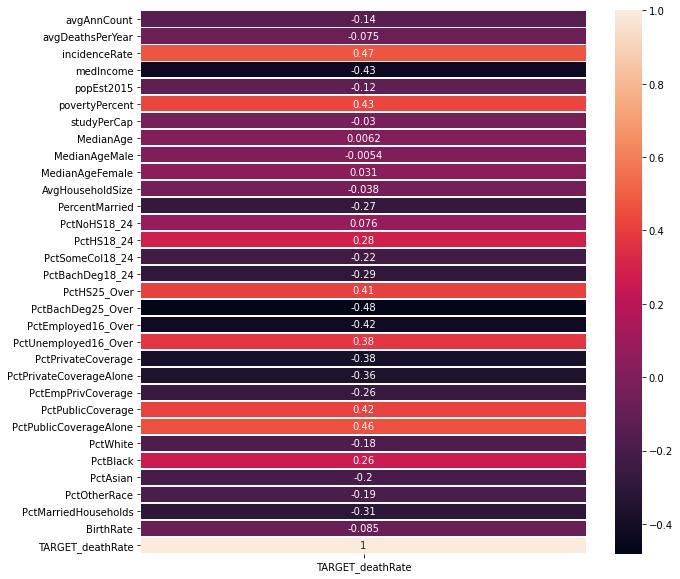

In [4]:
# Correlation matrix to know which parameters with the closst value to 0 to be ignored 
corr = cancer_data.corr()
Death = corr[['TARGET_deathRate']]
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(Death, annot=True, linewidths=.5, ax=ax)
plt.show()

In [5]:
del cancer_data['binnedInc']
del cancer_data['Geography']
del cancer_data['PctSomeCol18_24']
del cancer_data['MedianAge']
del cancer_data['MedianAgeMale']
display(cancer_data.head())

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,19.0,8,481.5,50038,2704,11.1,0.0,46.4,2.25,65.9,10.8,25.0,6.8,37.1,12.2,57.4,1.1,81.2,56.0,35.7,34.7,9.9,96.032049,0.724914,0.000000,0.000000,62.511457,15.157116,160.3
1,88.0,34,486.0,59399,14844,9.7,0.0,43.2,2.63,58.6,22.3,29.1,1.1,35.9,16.0,60.4,3.8,76.7,NaN,50.8,32.1,12.8,97.537344,0.719957,0.080743,0.040371,61.641045,3.293510,194.9
2,195.0,83,475.7,39721,25164,18.5,0.0,49.9,2.30,57.2,24.9,36.2,3.5,40.2,7.6,41.2,11.0,61.6,NaN,32.1,49.8,21.6,97.576566,0.360770,0.411749,0.082350,53.978102,6.390328,196.5
3,116.0,55,496.6,30299,17917,28.1,0.0,45.2,2.43,53.0,10.9,51.8,5.3,44.2,7.0,41.6,10.4,45.2,NaN,24.2,53.2,33.0,97.908650,0.161731,0.306731,0.340193,51.013143,5.124836,230.9
4,80.0,35,372.0,39625,14058,17.4,0.0,48.0,2.36,52.2,12.6,31.2,0.2,28.3,10.5,49.3,9.2,56.6,NaN,33.4,43.0,24.7,82.672551,1.834103,0.682617,8.253465,50.566426,3.897033,162.2


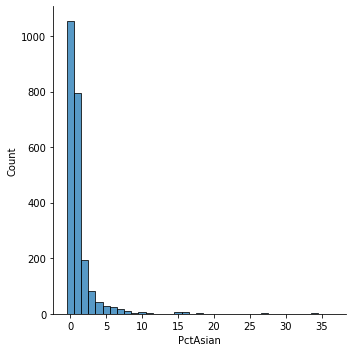

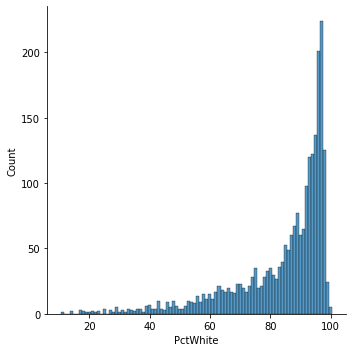

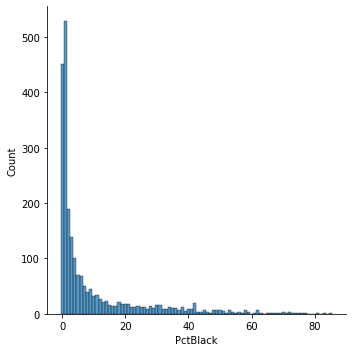

In [6]:
sns.displot(cancer_data, x="PctAsian", discrete=True)
sns.displot(cancer_data, x="PctWhite", discrete=True)
sns.displot(cancer_data, x="PctBlack", discrete=True)

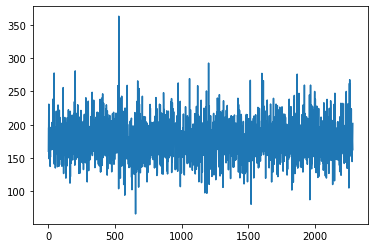

In [7]:
y_row=np.arange(len(cancer_data))
plt.plot(y_row, cancer_data['TARGET_deathRate'])
plt.show()

### Separate the Input and Target Features of the data

In [8]:
X=cancer_data.drop('TARGET_deathRate', axis=1)
y=cancer_data['TARGET_deathRate']

### Split the data into Train and Test Sets

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## Data Preparation

### Perform Data Preparation Steps

In [10]:
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


## Machine Learning Modelling

### Build any Machine Learning Model of your choice

In [11]:
from sklearn.ensemble import RandomForestRegressor
ranfor = RandomForestRegressor(random_state=1, max_depth=15)

In [13]:
ranfor.fit(X_train, y_train)

y_ranfor_train = ranfor.predict(X_train)
y_pred_ranfor = ranfor.predict(X_test)

In [17]:
print(y_ranfor_train)

[183.62371596 145.56677844 138.79125    ... 186.87528828 177.55630565
 183.39005349]


### Evaluate your model with various Evaluation Metrics

In [23]:
from sklearn import metrics

#print result of MAE
print("MAE Random Forest Training = ", metrics.mean_absolute_error(y_train, y_ranfor_train))
print("MAE Random Forest Test     = ", metrics.mean_absolute_error(y_test, y_pred_ranfor))


#print result of MSE
print("MSE Random Forest Training = ", metrics.mean_squared_error(y_train, y_ranfor_train))
print("MSE Random Forest Test     = ", metrics.mean_squared_error(y_test, y_pred_ranfor))


#print result of RMSE
print("RMSE Random Forest Training = ", np.sqrt(metrics.mean_squared_error(y_train, y_ranfor_train)))
print("RMSE Random Forest Test     = ", np.sqrt(metrics.mean_squared_error(y_test, y_pred_ranfor)))


MAE Random Forest Training =  5.520224516319203
MAE Random Forest Test     =  13.852613721720532
MSE Random Forest Training =  53.60536258578492
MSE Random Forest Test     =  362.70451119101614
RMSE Random Forest Training =  7.321568314629381
RMSE Random Forest Test     =  19.044802734368663


### Try out other Machine Learning Models and Evaluate them

In [36]:
from sklearn.tree import DecisionTreeRegressor
dectree = DecisionTreeRegressor(random_state=1, max_depth=15)


In [37]:
dectree.fit(X_train, y_train)

y_dectree_train = dectree.predict(X_train)
y_dectree_linear = dectree.predict(X_test)

In [38]:
#print result of MAE
print("MAE Decision Tree Training = ", metrics.mean_absolute_error(y_train, y_dectree_train))
print("MAE Decision Tree Test     = ", metrics.mean_absolute_error(y_test, y_dectree_linear))


#print result of MSE
print("MSE Decision Tree Training = ", metrics.mean_squared_error(y_train, y_dectree_train))
print("MSE Decision Tree Test     = ", metrics.mean_squared_error(y_test, y_dectree_linear))


#print result of RMSE
print("RMSE Decision Tree Training = ", np.sqrt(metrics.mean_squared_error(y_train, y_dectree_train)))
print("RMSE Decision Tree Test     = ", np.sqrt(metrics.mean_squared_error(y_test, y_dectree_linear)))

MAE Linear Regression Training =  2.380066161290531
MAE Linear Regression Test     =  20.325180626111493
MSE Linear Regression Training =  25.81659901318741
MSE Linear Regression Test     =  741.3705802773657
RMSE Linear Regression Training =  5.081003740717715
RMSE Linear Regression Test     =  27.22812113013613


## Hyperparameter Tuning using GridSearchCV

### Perform Hyperparameter Tuning

In [24]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth':[10,15,20], 'min_samples_leaf':[1,2,3],'min_samples_split':[2,3,4], 'n_estimators':[100,150,200]}
ranfor_CV = GridSearchCV(RandomForestRegressor(random_state=1, bootstrap=True), params, cv=5,verbose=2)

ranfor_CV.fit(X_train, y_train)
print(ranfor_CV.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   2.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   2.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   2.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   2.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   2.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150, total=   3.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150 
[CV]  max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=150, total=   3.0s
[CV] max_depth=10, min_samples_leaf=1, min_samples_s

[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed: 21.4min finished


{'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200}


### Evaluate your model 

In [25]:
y_ranforcv_train = ranfor_CV.predict(X_train)
y_pred_ranforcv = ranfor_CV.predict(X_test)

In [26]:
#print result of MSE
print("MSE Random Forest train cv= ", metrics.mean_squared_error(y_train, y_ranforcv_train))
print("MSE Random Forest test cv= ", metrics.mean_squared_error(y_test, y_pred_ranforcv))

print("RMSE Random Forest train cv= ", np.sqrt(metrics.mean_squared_error(y_train, y_ranforcv_train)))
print("RMSE Random Forest test cv= ", np.sqrt(metrics.mean_squared_error(y_test, y_pred_ranforcv)))

MSE Random Forest train cv=  60.38780470647492
MSE Random Forest test cv=  364.9028463985019
RMSE Random Forest train cv=  7.770959059631888
RMSE Random Forest test cv=  19.102430379365394


## Using Feature Selection with BorutaPy

### Use any Feature Selection Technique and observe if the model created by selected features performs better than the previous model

In [28]:
!pip install boruta
from boruta import BorutaPy

# define random forest classifier
forest = RandomForestRegressor(random_state=1)
 
forest.fit(X_train, y_train)

     |████████████████████████████████| 61kB 4.1MB/s 


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [29]:
# define Boruta feature selection method
# boruta_selector = BorutaPy(forest, n_estimators='auto', verbose=2)
boruta_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
boruta_selector.fit(np.array(X_train), np.array(y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	28
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	13
Tentative: 	11
Rejected: 	4
Iteration: 	9 / 100
Confirmed: 	13
Tentative: 	11
Rejected: 	4
Iteration: 	10 / 100
Confirmed: 	13
Tentative: 	11
Rejected: 	4
Iteration: 	11 / 100
Confirmed: 	13
Tentative: 	11
Rejected: 	4
Iteration: 	12 / 100
Confirmed: 	13
Tentative: 	11
Rejected: 	4
Iteration: 	13 / 100
Confirmed: 	13
Tentative: 	11
Rejected: 	4
Iteration: 	14 / 100
Confirmed: 	13
Tentative: 	11
Rejected: 	4
Iteration: 	15 / 100
Confirmed: 	13
Tentative: 	11
Rejected: 	4
Iteration: 	16 / 100
Confirmed: 	17
Tentative: 	7
Reject

BorutaPy(alpha=0.05,
         estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                         criterion='mse', max_depth=None,
                                         max_features='auto',
                                         max_leaf_nodes=None, max_samples=None,
                                         min_impurity_decrease=0.0,
                                         min_impurity_split=None,
                                         min_samples_leaf=1,
                                         min_samples_split=2,
                                         min_weight_fraction_leaf=0.0,
                                         n_estimators=67, n_jobs=None,
                                         oob_score=False,
                                         random_state=RandomState(MT19937) at 0x7F47871E7DB0,
                                         verbose=0, warm_start=False),
         max_iter=100, n_estimators='auto', perc=100,
         random

In [30]:
# check selected features
print("Selected Features: ", boruta_selector.support_)
 
# check ranking of features
print("Ranking: ",boruta_selector.ranking_)

print("No. of significant features: ", boruta_selector.n_features_)

Selected Features:  [False  True  True  True  True  True False  True  True  True False  True
 False  True  True  True  True  True False False False  True False  True
  True  True  True False]
Ranking:  [3 1 1 1 1 1 9 1 1 1 6 1 3 1 1 1 1 1 8 7 5 1 3 1 1 1 1 2]
No. of significant features:  19


In [31]:
# Visualized in the form of a table
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':boruta_selector.ranking_})
selected_rfe_features

,Feature,Ranking
0,avgAnnCount,3
1,avgDeathsPerYear,1
2,incidenceRate,1
3,medIncome,1
4,popEst2015,1
5,povertyPercent,1
6,studyPerCap,9
7,MedianAgeFemale,1
8,AvgHouseholdSize,1
9,PercentMarried,1


In [32]:
#Select predictors using only the most important one by Boruta
X_important_train = boruta_selector.transform(np.array(X_train))
X_important_test = boruta_selector.transform(np.array(X_test))


In [33]:
# Create a new random forest classifier for the most important features with parameters from GridSearchCV
rf_important = RandomForestRegressor(random_state=1, max_depth= 20, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200)

# Train the new classifier on the new dataset containing the most important features
rf_important.fit(X_important_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [34]:
# Apply The Limited Featured Classifier To The Test Data
y_important_pred = rf_important.predict(X_important_test)

print("MSE_testcv= ", metrics.mean_squared_error(y_test, y_important_pred))

MSE_testcv=  356.6822673784834


In [39]:
#MSE Comparation of each model, hyperparameter tuning, and feature selection
print("MSE Random Forest Test         = ", metrics.mean_squared_error(y_test, y_pred_ranfor))
print("MSE Decision Tree Test         = ", metrics.mean_squared_error(y_test, y_dectree_linear))
print("MSE Random Forest test cv      = ", metrics.mean_squared_error(y_test, y_pred_ranforcv))
print("MSE Boruta                     = ", metrics.mean_squared_error(y_test, y_important_pred))

MSE Random Forest Test         =  362.70451119101614
MSE Decision Tree Test         =  741.3705802773657
MSE Random Forest test cv      =  364.9028463985019
MSE Boruta                     =  356.6822673784834


## Conclusion

Based on the MSE value above, it can be seen that Random Forest with hyperparameter tuning and feature selection gives the best result. It has MSE of **356.68**, although it is still a large number but for a starter it gives me confidence to do more.